<h2>Example 2: Chain Event Graph from Non-Stratified Dataset</h2>

This example builds a Chain Event Graph (CEG) from a non-symmetric dataset. This class of CEGs is called _non-stratified_.

The dataset has some structural missing variables in certain rows; in other words, the sample space of a variable is different, or sometimes empty depending on its ancestral variables. So logically, certain values of the variable will never be observed for certain configurations of its ancestral variables, irrespective of the sample size. 

In this example, by interventional design, individuals who are not assessed are not offered referral or treatment. In this case, we would observe individuals in our dataset who are not assessed, going down the ‘Not Referred & Not Treated’ path with probability 1. This is not helpful, and so we choose to condense the tree and remove this edge. The zero observations for non-assessed individuals for the categories of ‘Referred & Treated’ and ‘Not Referred & Treated’ are both structural zeros.

In [2]:
from cegpy import EventTree
import pandas as pd

dataframe = pd.read_excel("falls.xlsx")
dataframe

,HousingAssessment,Risk,Treatment,Fall
0,Community Not Assessed,Low Risk,NaN,Fall
1,Community Not Assessed,High Risk,NaN,Fall
2,Community Not Assessed,Low Risk,NaN,Don't Fall
3,Community Not Assessed,Low Risk,NaN,Don't Fall
4,Community Not Assessed,Low Risk,NaN,Fall
...,...,...,...,...
49995,Community Not Assessed,Low Risk,NaN,Don't Fall
49996,Community Not Assessed,Low Risk,NaN,Don't Fall
49997,Community Not Assessed,Low Risk,NaN,Don't Fall
49998,Community Not Assessed,Low Risk,NaN,Fall


_Note: When looking at the description of the dataset, the total count in the 'Treament' column is not equal to the counts for the other columns. This is the giveaway that the dataset is non-stratified. Extreme care must be taken to ensure that the dataset really is non-stratified, and doesn't simply have sampling-zeros or sampling missing values. The package has no way of distinguishing these on its own unless the user specifies them. For more information, please see the `missing_values` example._

In [3]:
dataframe.describe()

,HousingAssessment,Risk,Treatment,Fall
count,50000,50000,3250,50000
unique,4,2,3,2
top,Community Not Assessed,Low Risk,Not Referred & Not Treated,Don't Fall
freq,45211,42505,1768,34737


The end result of this is that in the `EventTree` shown below, paths such as S<SUB>0</SUB> -> S<SUB>2</SUB> -> S<SUB>7</SUB> -> S<SUB>18</SUB> skip the 'Treatment' variable. 

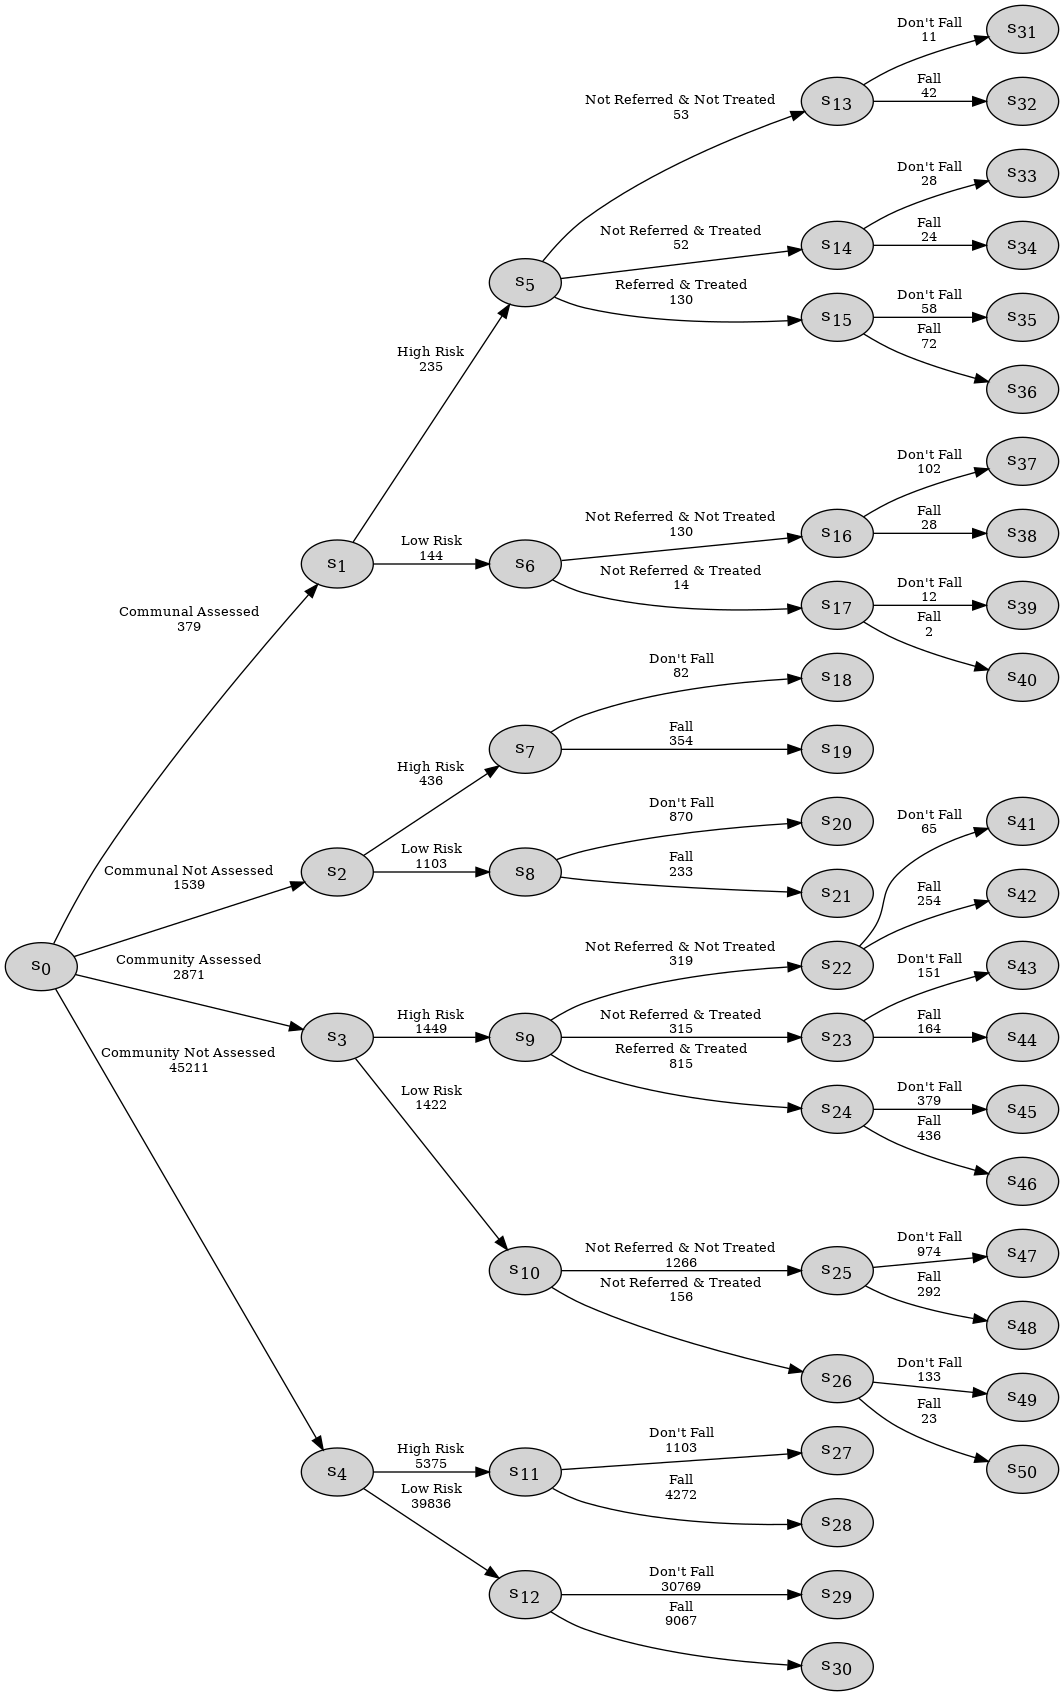

In [4]:
event_tree = EventTree(dataframe)
event_tree.create_figure()

<h3>Chain Event Graph Construction</h3>

As in the stratified medical example (see: `basic_example.ipynb`), after initial checks on the dataset, and confirmation that the `EventTree` looks as expected, the next step is to identify the sets of stages. In this package we use the `StagedTree` class, which first creates the `EventTree` internally, ready for the user to run a clustering algorithm on it. In this example we use the `calculate_AHC_transitions()` method, which excutes the AHC algorithm on the `EventTree`.

The resultant CEG has been reduced from the tree respresentation to a more compact graph.

_Note: The arguments for this method can be customised. See the `customised_AHC.ipynb` example._

/home/vscode/.local/lib/python3.9/site-packages/cegpy/trees/_staged.py:421: RuntimeWarning: invalid value encountered in double_scalars
  self._calculate_lg_of_sum(new_prior)


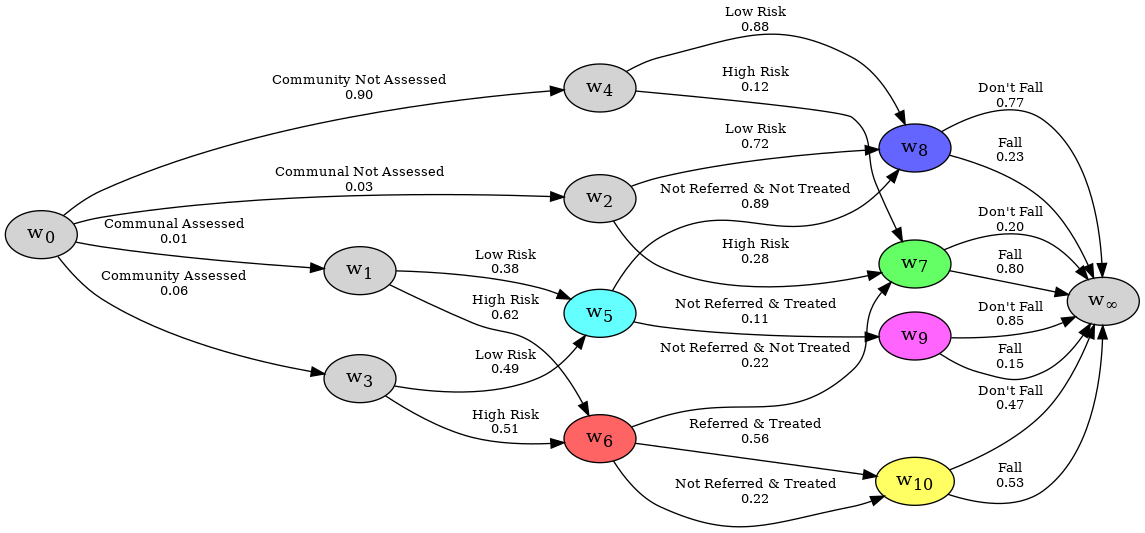

In [6]:
from cegpy import ChainEventGraph, StagedTree

st = StagedTree(dataframe)
st.calculate_AHC_transitions()

ceg = ChainEventGraph(st)
ceg.create_figure()